# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file   = 'data/train.p'
validation_file = 'data/valid.p'
testing_file    = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
# +1 since starts with 0
n_classes = max(y_train)+1
# save max class number
ttt = max(train['labels'])

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Class -  41


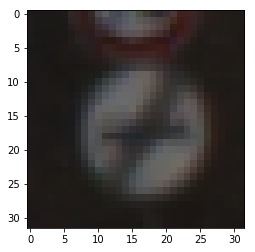

Class -  31


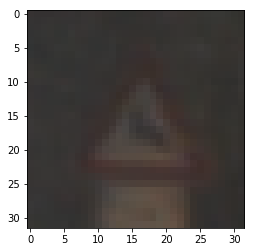

Class -  36


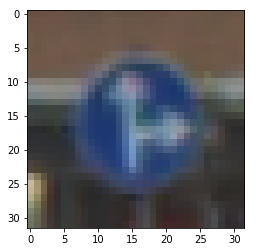

Class -  26


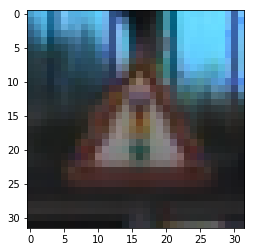

Class -  23


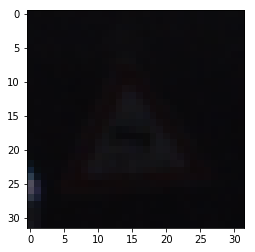

Class -  1


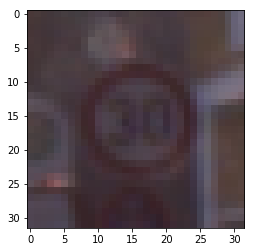

Class -  40


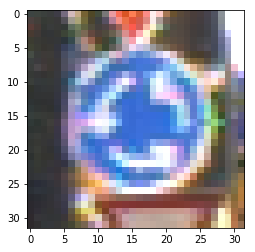

Class -  22


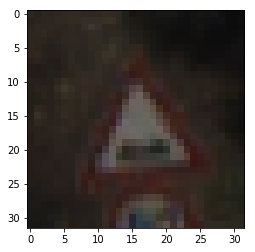

Class -  37


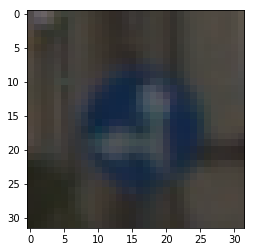

Class -  16


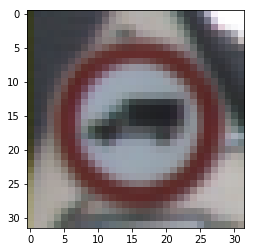

Class -  3


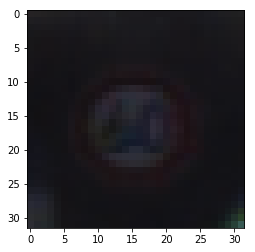

Class -  19


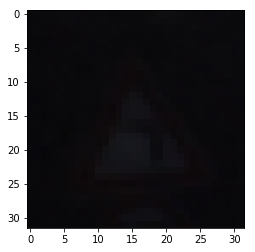

Class -  4


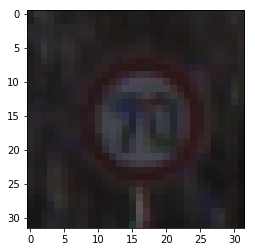

Class -  11


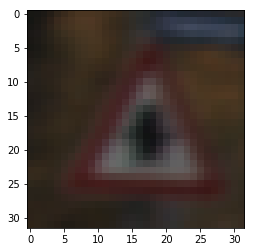

Class -  42


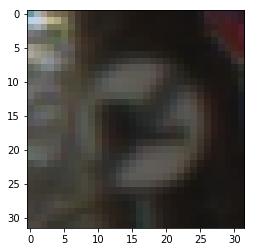

Class -  0


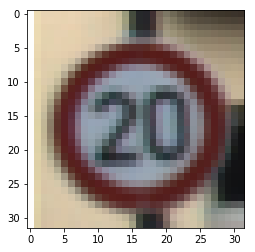

Class -  32


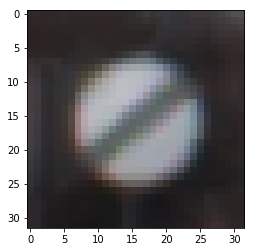

Class -  27


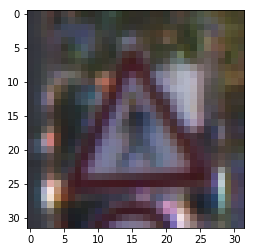

Class -  29


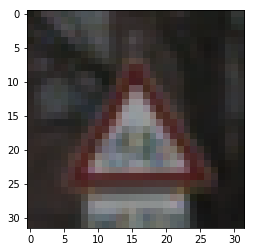

Class -  24


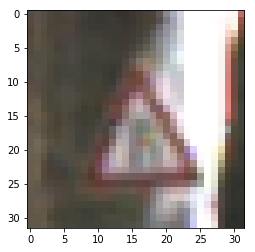

Class -  9


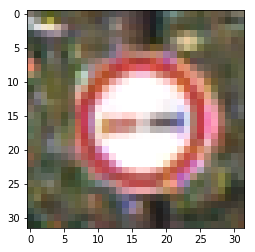

Class -  5


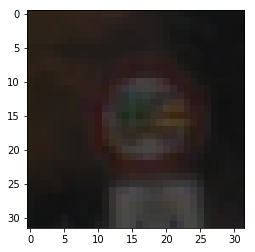

Class -  38


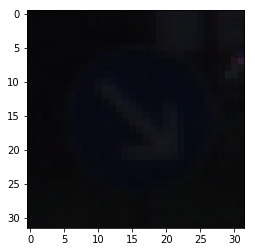

Class -  8


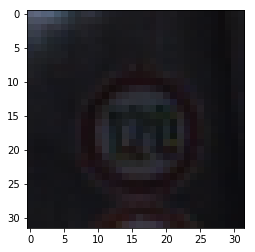

Class -  10


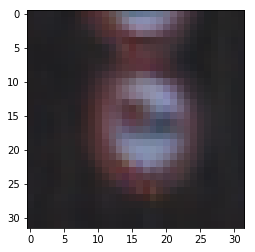

Class -  35


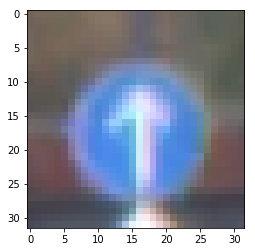

Class -  34


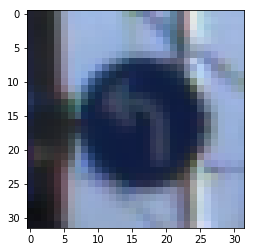

Class -  18


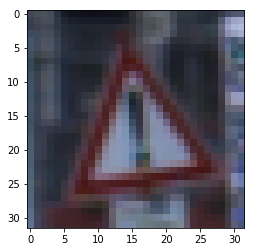

Class -  6


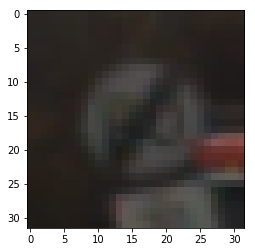

Class -  13


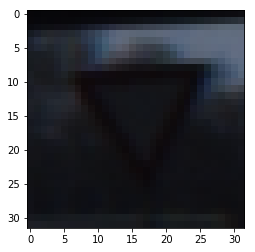

Class -  7


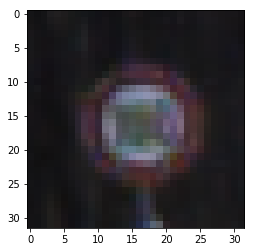

Class -  30


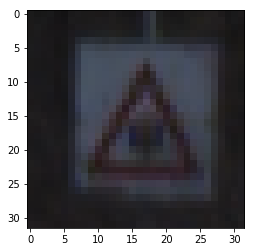

Class -  39


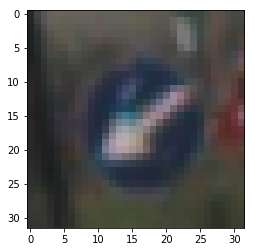

Class -  21


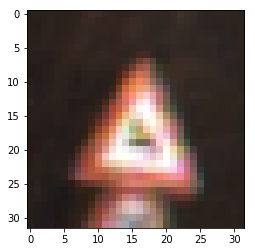

Class -  20


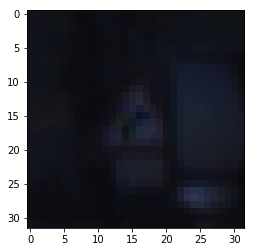

Class -  33


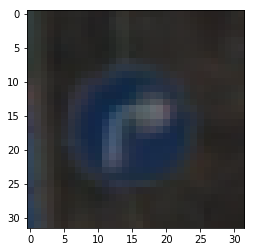

Class -  28


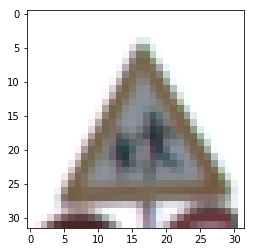

Class -  12


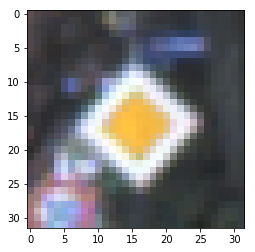

Class -  14


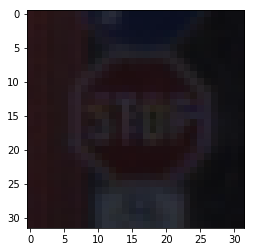

Class -  15


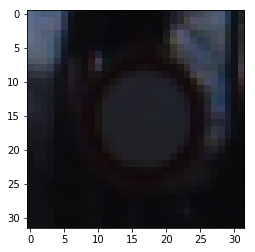

Class -  17


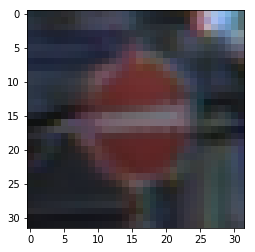

Class -  2


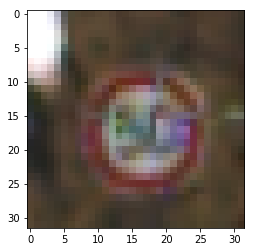

Class -  25


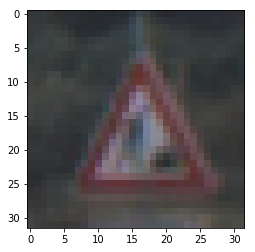

In [3]:
%matplotlib inline

import pickle as pkl
import time

import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
import tensorflow as tf

# There are two ways of solving this problem.
# One is to have the matmul at the last layer output all 11 classes.
# The other is to output just 10 classes, and use a constant value of 0 for
# the logit for the last class. This still works because the softmax only needs
# n independent logits to specify a probability distribution over n + 1 categories.

# Here we use additional class, since we have class "0" as "Speed limit (20km/h)"
extra_class = 1


# Visualize all picture for every class
woc={}
for l in range(len(train['labels'])):
    if not train['labels'][l] in woc.keys():
        print("Class - ", train['labels'][l])
        plt.imshow(train['features'][l])
        plt.show()
        woc[train['labels'][l]] = train['labels'][l]

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Whole architecture is based on Deep Learning Nanodegree lab project
# https://github.com/udacity/deep-learning/tree/master/semi-supervised
# With significant in generator, discriminator, dataset, etc.

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

In [6]:
!mkdir data

A subdirectory or file data already exists.


In [7]:
# imports
import keras
import pickle
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [8]:
# Generate some additional images with twist, zoom and slide along the pic

training_file   = 'data/train.p'
validation_file = 'data/valid.p'
testing_file    = 'data/test.p'

with open(training_file, mode='rb') as f:
    trainset = pickle.load(f)
with open(validation_file, mode='rb') as f:
    validset = pickle.load(f)
with open(testing_file, mode='rb') as f:
    testset = pickle.load(f)


dk = keras.preprocessing.image.ImageDataGenerator(
                                rotation_range=12,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                shear_range=0.1,
                                zoom_range=0.1,
                                fill_mode='nearest',
                                horizontal_flip=False,
                                vertical_flip=False
                                )

train_x, train_y=[],[]
ii=0

for i,j in dk.flow(trainset['features'] , trainset['labels'],batch_size=1):
    #print(np.shape(i))
    train_x.append(i[0])
    train_y.append(int(j))
    
    ii+=1
    # Generate pitcites half the size of the dataset
    if ii >= len(trainset['labels'])//4:
        break



Base images
123.0
10.0


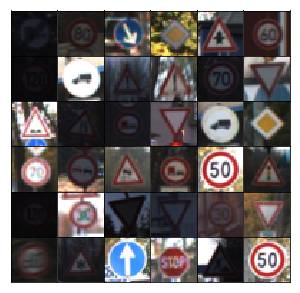

In [9]:
### Show pictures in data-set

# select randomly
idx = np.random.randint(0, validset['features'].shape[0], size=36)

# plot
fig, axes = plt.subplots(6, 6, sharex=True, sharey=True, figsize=(5,5),)
for ii, ax in zip(idx, axes.flatten()):
    ax.imshow(validset['features'][ii], aspect='equal')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

print('Base images')
plt.subplots_adjust(wspace=0, hspace=0)
print(np.max(train_x[0]))
print(np.min(train_x[0]))

Augmented images
123.0
10.0


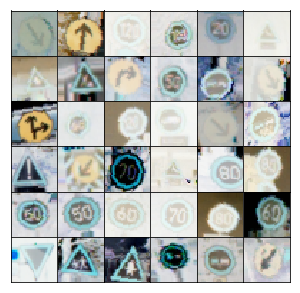

In [10]:
### Show Keras preprocesseed images


idx = np.random.randint(0, len(train_x), size=36)
fig, axes = plt.subplots(6, 6, sharex=True, sharey=True, figsize=(5,5),)
for ii, ax in zip(idx, axes.flatten()):
    
    ax.imshow(train_x[ii], aspect='equal')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
print('Augmented images')
plt.subplots_adjust(wspace=0, hspace=0)
print(np.max(train_x[0]))
print(np.min(train_x[0]))

Before


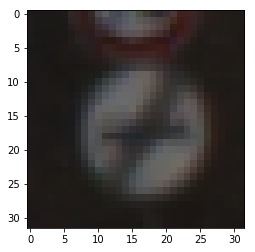

After


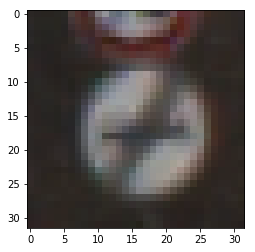

In [11]:
import cv2

### Let's brighten things up

print('Before')
plt.imshow(trainset['features'][0])
plt.show()

for i in range(len(validset['features'])):
    im_g = cv2.GaussianBlur(validset['features'][i], (3,3), 10.0)
    validset['features'][i] = cv2.addWeighted(validset['features'][i], 2, im_g, -0.5, 0, validset['features'][i])

for i in range(len(trainset['features'])):
    im_g = cv2.GaussianBlur(trainset['features'][i], (3,3), 10.0)
    trainset['features'][i] = cv2.addWeighted(trainset['features'][i], 2, im_g, -0.5, 0, trainset['features'][i])

for i in range(len(testset['features'])):
    im_g = cv2.GaussianBlur(testset['features'][i], (3,3), 10.0)
    testset['features'][i] = cv2.addWeighted(testset['features'][i], 2, im_g, -0.5, 0, testset['features'][i])
    
    


print('After')
plt.imshow(trainset['features'][0])

In [12]:
# Function to scale data from min - max to 0 - 1
def scale(x, feature_range=(0, 1)):
    # scale to (0, 1)
    x = ((x - np.min(x))/float((255 - np.min(x))))
    
    # scale to feature_range
    min, max = feature_range
    x = x * (max - min) + min
    return x


In [13]:
print(len(trainset['features']))
print(len(train_x))

# Scale generated images separately
# (not always have the same min-max)
train_x           = scale(train_x)

# Scale features
testset['features']  = scale(testset['features'])
validset['features'] = scale(validset['features'])
trainset['features'] = scale(trainset['features'])

# Add generated images and lables to main variables
trainset['features'] = np.append(trainset['features'],train_x,0)
trainset['labels']   = np.append(trainset['labels'],train_y,0)

print(len(trainset['features']))

34799
8699
43498


In [14]:
class Dataset:
    def __init__(self, trainset, testset, validset, val_frac=0.5, shuffle=True):
        
        # Ininitalize training, testing, validation sets
        self.test_x  = testset['features']
        self.valid_x = validset['features']
        self.test_y  = testset['labels']
        self.valid_y = validset['labels']
        self.train_x = trainset['features']
        self.train_y = trainset['labels']
        
        # No mask train it all
        self.label_mask = np.ones_like(self.train_y)
        
        # Randomize order of the data
        self.shuffle = shuffle
        
    # get batches    
    def batches(self, batch_size, which_set="train"):
        x_name = which_set + "_x"
        y_name = which_set + "_y"
        
        num_examples = len(getattr(dataset, y_name))
        if self.shuffle:
            idx = np.arange(num_examples)
            np.random.shuffle(idx)
            setattr(dataset, x_name, getattr(dataset, x_name))
            setattr(dataset, y_name, getattr(dataset, y_name))
            if which_set == "train":
                dataset.label_mask = dataset.label_mask[idx]
        
        dataset_x = getattr(dataset, x_name)
        dataset_y = getattr(dataset, y_name)
        for ii in range(0, num_examples, batch_size):
            x = dataset_x[ii:ii+batch_size]
            y = dataset_y[ii:ii+batch_size]
            
            if which_set == "train":
                # When we use the data for training, we need to include
                # the label mask, so we can pretend we don't have access
                # to some of the labels, as an exercise of our semi-supervised
                # learning ability
                yield x, y, self.label_mask[ii:ii+batch_size]
            else:
                yield x, y

In [15]:
def model_inputs(real_dim, z_dim):
    inputs_real = tf.placeholder(tf.float32, (None, *real_dim), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    y = tf.placeholder(tf.int32, (None), name='y')
    label_mask = tf.placeholder(tf.int32, (None), name='label_mask')
    
    return inputs_real, inputs_z, y, label_mask

In [16]:
def generator(z, output_dim, reuse=False, alpha=0.2, training=True, size_mult=128):
    with tf.variable_scope('generator', reuse=reuse):
        # First fully connected layer
        x1 = tf.layers.dense(z, 4 * 4 * size_mult * 4)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 4, 4, size_mult * 4))
        x1 = tf.layers.batch_normalization(x1, training=training)
        #rep activ
        x1 = tf.maximum(alpha * x1, x1)
        #x1 = tf.nn.relu(x1)
        
        
        x2 = tf.layers.conv2d_transpose(x1, size_mult * 4, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=training)
        #rep activ
        x2 = tf.maximum(alpha * x2, x2)
        #x2 = tf.nn.relu(x2)
        
        
        #added
        x2 = tf.layers.dropout(x2, rate=0.5)
        
        #added
        x2 = tf.layers.conv2d_transpose(x2, size_mult * 2, 5, strides=1, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=training)
        #rep activ
        x2 = tf.maximum(alpha * x2, x2)
        #x2 = tf.nn.relu(x2)
        
        
        x3 = tf.layers.conv2d_transpose(x2, size_mult, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=training)
        x3 = tf.maximum(alpha * x3, x3)
        #x3 = tf.nn.relu(x3)
        
        
        x3 = tf.layers.conv2d_transpose(x3, size_mult, 5, strides=1, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=training)
        x3 = tf.maximum(alpha * x3, x3)
        
        #added
        x3 = tf.layers.dropout(x3, rate=0.5)
        
        #added
        x3 = tf.layers.conv2d_transpose(x3, size_mult, 5, strides=1, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=training)
        x3 = tf.maximum(alpha * x3, x3)
        #x3 = tf.nn.relu(x3)
        
        #added
        x3 = tf.layers.conv2d_transpose(x3, size_mult, 5, strides=1, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=training)
        x3 = tf.maximum(alpha * x3, x3)
        #x3 = tf.nn.relu(x3)
        
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, output_dim, 5, strides=2, padding='same')
        
        out = tf.tanh(logits)
        
        return out

In [17]:
def discriminator(x, reuse=False, alpha=0.2, drop_rate=0., num_classes=ttt, size_mult=64):
    with tf.variable_scope('discriminator', reuse=reuse):
        x = tf.layers.dropout(x, rate=drop_rate/2.5)
        
        # Input layer is 32x32x3
        x1 = tf.layers.conv2d(x, size_mult, 3, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        relu1 = tf.layers.dropout(relu1, rate=drop_rate)
        
        x2 = tf.layers.conv2d(relu1, size_mult, 3, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        
        
        x3 = tf.layers.conv2d(relu2, size_mult, 3, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        relu3 = tf.layers.dropout(relu3, rate=drop_rate)
        
        x4 = tf.layers.conv2d(relu3, 2 * size_mult, 3, strides=1, padding='same')
        bn4 = tf.layers.batch_normalization(x4, training=True)
        relu4 = tf.maximum(alpha * bn4, bn4)
        
        '''
        #added
        x4_2 = tf.layers.conv2d(relu4, 2 * size_mult, 5, strides=1, padding='same')
        bn4_2 = tf.layers.batch_normalization(x4_2, training=True)
        relu4 = tf.maximum(alpha * bn4_2, bn4_2)
        relu4 = tf.layers.dropout(relu4, rate=drop_rate)
        '''
        
        x5 = tf.layers.conv2d(relu4, 2 * size_mult, 3, strides=1, padding='same')
        bn5 = tf.layers.batch_normalization(x5, training=True)
        relu5 = tf.maximum(alpha * bn5, bn5)
        
        x6 = tf.layers.conv2d(relu5, 2 * size_mult, 3, strides=1, padding='same')
        bn6 = tf.layers.batch_normalization(x6, training=True)
        relu6 = tf.maximum(alpha * bn6, bn6)
        relu6 = tf.layers.dropout(relu6, rate=drop_rate)
        
        
        x7 = tf.layers.conv2d(relu6, 2 * size_mult, 3, strides=1, padding='valid')
        # Don't use bn on this layer, because bn would set the mean of each feature
        # to the bn mu parameter.
        # This layer is used for the feature matching loss, which only works if
        # the means can be different when the discriminator is run on the data than
        # when the discriminator is run on the generator samples.
        relu7 = tf.maximum(alpha * x7, x7)
        
        # Flatten it by global average pooling
        features = tf.reduce_mean(relu7, (1, 2))
        
        # Set class_logits to be the inputs to a softmax distribution over the different classes
        class_logits = tf.layers.dense(features, num_classes + extra_class)
        
        
        # Set gan_logits such that P(input is real | input) = sigmoid(gan_logits).
        # Keep in mind that class_logits gives you the probability distribution over all the real
        # classes and the fake class. You need to work out how to transform this multiclass softmax
        # distribution into a binary real-vs-fake decision that can be described with a sigmoid.
        # Numerical stability is very important.
        # You'll probably need to use this numerical stability trick:
        # log sum_i exp a_i = m + log sum_i exp(a_i - m).
        # This is numerically stable when m = max_i a_i.
        # (It helps to think about what goes wrong when...
        #   1. One value of a_i is very large
        #   2. All the values of a_i are very negative
        # This trick and this value of m fix both those cases, but the naive implementation and
        # other values of m encounter various problems)
        
        if extra_class:
            real_class_logits, fake_class_logits = tf.split(class_logits, [num_classes, 1], 1)
            assert fake_class_logits.get_shape()[1] == 1, fake_class_logits.get_shape()
            fake_class_logits = tf.squeeze(fake_class_logits)
        else:
            real_class_logits = class_logits
            fake_class_logits = 0.
        
        mx = tf.reduce_max(real_class_logits, 1, keep_dims=True)
        stable_real_class_logits = real_class_logits - mx

        gan_logits = tf.log(tf.reduce_sum(tf.exp(stable_real_class_logits), 1)) + tf.squeeze(mx) - fake_class_logits
        
        out = tf.nn.softmax(class_logits)
        
        return out, class_logits, gan_logits, features

In [18]:
def model_loss(input_real, input_z, output_dim, y, num_classes, label_mask, alpha=0.2, drop_rate=0.):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param output_dim: The number of channels in the output image
    :param y: Integer class labels
    :param num_classes: The number of classes
    :param alpha: The slope of the left half of leaky ReLU activation
    :param drop_rate: The probability of dropping a hidden unit
    :return: A tuple of (discriminator loss, generator loss)
    """
    
    
    # These numbers multiply the size of each layer of the generator and the discriminator,
    # respectively. You can reduce them to run your code faster for debugging purposes.
    g_size_mult = 32
    d_size_mult = 64
    
    # Here we run the generator and the discriminator
    g_model = generator(input_z, output_dim, alpha=alpha, size_mult=g_size_mult)
    d_on_data = discriminator(input_real, alpha=alpha, drop_rate=drop_rate, size_mult=d_size_mult)
    d_model_real, class_logits_on_data, gan_logits_on_data, data_features = d_on_data
    
    tf.identity(d_model_real,'softmax')
    
    d_on_samples = discriminator(g_model, reuse=True, alpha=alpha, drop_rate=drop_rate, size_mult=d_size_mult)
    d_model_fake, class_logits_on_samples, gan_logits_on_samples, sample_features = d_on_samples
    
    
    # Here we compute `d_loss`, the loss for the discriminator.
    # This should combine two different losses:
    #  1. The loss for the GAN problem, where we minimize the cross-entropy for the binary
    #     real-vs-fake classification problem.
    #  2. The loss for the SVHN digit classification problem, where we minimize the cross-entropy
    #     for the multi-class softmax. For this one we use the labels. Don't forget to ignore
    #     use `label_mask` to ignore the examples that we are pretending are unlabeled for the
    #     semi-supervised learning problem.
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=gan_logits_on_data,
                                                labels=tf.ones_like(gan_logits_on_data)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=gan_logits_on_samples,
                                                labels=tf.zeros_like(gan_logits_on_samples)))
    y = tf.squeeze(y)
    class_cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=class_logits_on_data,
                                                                  labels=tf.one_hot(y, num_classes + extra_class,
                                                                                    dtype=tf.float32))
    class_cross_entropy = tf.squeeze(class_cross_entropy)
    label_mask = tf.squeeze(tf.to_float(label_mask))
    d_loss_class = tf.reduce_sum(label_mask * class_cross_entropy) / tf.maximum(1., tf.reduce_sum(label_mask))
    d_loss = d_loss_class + d_loss_real + d_loss_fake
    
    # Here we set `g_loss` to the "feature matching" loss invented by Tim Salimans at OpenAI.
    # This loss consists of minimizing the absolute difference between the expected features
    # on the data and the expected features on the generated samples.
    # This loss works better for semi-supervised learning than the tradition GAN losses.
    data_moments = tf.reduce_mean(data_features, axis=0)
    sample_moments = tf.reduce_mean(sample_features, axis=0)
    g_loss = tf.reduce_mean(tf.abs(data_moments - sample_moments))

    pred_class = tf.cast(tf.argmax(class_logits_on_data, 1), tf.int32)
    eq = tf.equal(tf.squeeze(y), pred_class)
    correct = tf.reduce_sum(tf.to_float(eq))
    masked_correct = tf.reduce_sum(label_mask * tf.to_float(eq))
    
    return d_loss, g_loss, correct, masked_correct, g_model

In [19]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # Get weights and biases to update. Get them separately for the discriminator and the generator
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    for t in t_vars:
        assert t in d_vars or t in g_vars

    # Minimize both players' costs simultaneously
    d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    shrink_lr = tf.assign(learning_rate, (learning_rate * 0.99))
    
    return d_train_opt, g_train_opt, shrink_lr

In [20]:
class GAN:
    """
    A GAN model.
    :param real_size: The shape of the real data.
    :param z_size: The number of entries in the z code vector.
    :param learnin_rate: The learning rate to use for Adam.
    :param num_classes: The number of classes to recognize.
    :param alpha: The slope of the left half of the leaky ReLU activation
    :param beta1: The beta1 parameter for Adam.
    """
    def __init__(self, real_size, z_size, learning_rate, num_classes=ttt, alpha=0.2, beta1=0.5):
        tf.reset_default_graph()
        
        self.learning_rate = tf.Variable(learning_rate, trainable=False)
        self.input_real, self.input_z, self.y, self.label_mask = model_inputs(real_size, z_size)
        self.drop_rate = tf.placeholder_with_default(.5, (), "drop_rate")
        
        loss_results = model_loss(self.input_real, self.input_z,
                                              real_size[2], self.y, num_classes, label_mask=self.label_mask,
                                                                          alpha=0.2,
                                                           drop_rate=self.drop_rate)
        self.d_loss, self.g_loss, self.correct, self.masked_correct, self.samples = loss_results
        
        self.d_opt, self.g_opt, self.shrink_lr = model_opt(self.d_loss, self.g_loss, self.learning_rate, beta1)

In [21]:
def view_samples(epoch, samples, nrows, ncols, figsize=(5,5)):
    fig, axes = plt.subplots(figsize=figsize, nrows=nrows, ncols=ncols, 
                             sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch]):
        ax.axis('off')
        img = ((img - img.min())*255 / (img.max() - img.min())).astype(np.uint8)
        ax.set_adjustable('box-forced')
        im = ax.imshow(img)
   
    plt.subplots_adjust(wspace=0, hspace=0)
    return fig, axes

In [22]:
def train(net, dataset, epochs, batch_size, figsize=(5,5)):
    
    max_valid = 0
    
    saver = tf.train.Saver()
    sample_z = np.random.normal(0, 1, size=(50, z_size))

    samples, train_accuracies, test_accuracies, valid_accuracies = [], [], [], []
    steps = 0
            
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for e in range(epochs):
            print("Epoch",e)
            
            t1e = time.time()
            num_examples = 0
            num_correct = 0
            
            
            
            
            for x, y, label_mask in dataset.batches(batch_size):
                #assert 'int' in str(y.dtype)
                
                steps += 1
                num_examples += label_mask.sum()

                # Sample random noise for G
                batch_z = np.random.normal(0, 1, size=(batch_size, z_size))

                # Run optimizers
                t1 = time.time()
                
                
                '''
                print(np.shape(x))
                print(np.shape(net.input_real))
                print(np.shape(y))
                print(np.shape(net.y))
                print(np.shape(net.correct.shape))
                '''
                _, _, correct = sess.run([net.d_opt, net.g_opt, net.masked_correct],
                                         feed_dict={net.input_real: x, net.input_z: batch_z,
                                                    net.y : y[:,None], net.label_mask : label_mask})
                t2 = time.time()
                num_correct += correct

            sess.run([net.shrink_lr])
            
            
            train_accuracy = num_correct / float(num_examples)
            
            print("\t\tClassifier train accuracy: ", train_accuracy)
            
            num_examples = 0
            num_correct = 0
            for x, y in dataset.batches(batch_size, which_set="test"):
                assert 'int' in str(y.dtype)
                num_examples += x.shape[0]
                
                '''
                print('new')
                print(np.shape(x))
                print(np.shape(net.input_real))
                print(np.shape(y))
                print(np.shape(net.y))
                print(np.shape(net.correct.shape))
                '''
                
                correct, = sess.run([net.correct], feed_dict={net.input_real: x,
                                                   net.y : y,
                                                   net.drop_rate: 0.})
                
                num_correct += correct
            
            test_accuracy = num_correct / float(num_examples)
            print("\t\tClassifier test accuracy", test_accuracy)
            #print("\t\tStep time: ", t2 - t1)
            t2e = time.time()
            #print("\t\tEpoch time: ", t2e - t1e)
            
            
            num_examples = 0
            num_correct = 0
            for x, y in dataset.batches(batch_size, which_set="valid"):
                assert 'int' in str(y.dtype)
                num_examples += x.shape[0]

                correct, = sess.run([net.correct], feed_dict={net.input_real: x,
                                                   net.y : y,
                                                   net.drop_rate: 0.})
                
                num_correct += correct
            
            validation_accuracy = num_correct / float(num_examples)
            print("\t\tClassifier validation accuracy", validation_accuracy)
            #print("\t\tStep time: ", t2 - t1)
            t2e = time.time()
            #print("\t\tEpoch time: ", t2e - t1e)
            
            

            
            
            # Save history of accuracies to view after training
            train_accuracies.append(train_accuracy)
            test_accuracies.append(test_accuracy)
            valid_accuracies.append(validation_accuracy)

            if max_valid == 0:
                max_valid = np.max(valid_accuracies)
            elif np.max(valid_accuracies) > max_valid:
                max_valid = np.max(valid_accuracies)
                saver.save(sess, './checkpoints/generator_{}.ckpt'.format(max_valid))
                
                gen_samples = sess.run(net.samples,
                                       feed_dict={net.input_z: sample_z})
                
                samples.append(gen_samples)
                _ = view_samples(-1, samples, 5, 10, figsize=figsize)
                plt.show()

    with open('samples.pkl', 'wb') as f:
        pkl.dump(samples, f)
    
    return train_accuracies, test_accuracies, valid_accuracies, samples

In [23]:
!mkdir checkpoints

A subdirectory or file checkpoints already exists.


In [ ]:
real_size = (32,32,3)
z_size = 100
learning_rate = 0.0003

net = GAN(real_size, z_size, learning_rate,ttt)

[<tf.Tensor 'gradients/discriminator_1/split_grad/concat:0' shape=(?, 43) dtype=float32>, None, None]
[<tf.Tensor 'gradients/discriminator/split_grad/concat:0' shape=(?, 43) dtype=float32>, None, None]


Epoch 0
		Classifier train accuracy:  0.498804542738
		Classifier test accuracy 0.164766429137
		Classifier validation accuracy 0.112698412698
Epoch 1
		Classifier train accuracy:  0.498229803669
		Classifier test accuracy 0.221773555028
		Classifier validation accuracy 0.127437641723


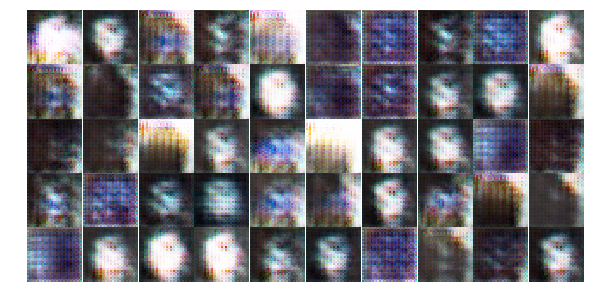

Epoch 2


In [ ]:
dataset = Dataset(trainset, testset, validset)

batch_size = 64
epochs = 300
train_accuracies, test_accuracies, valid_accuracies, samples = train(net, dataset, epochs, batch_size, figsize=(10,5))

In [ ]:
fig, ax = plt.subplots()
plt.plot(train_accuracies, label='Train', alpha=0.5)
plt.plot(test_accuracies, label='Test', alpha=0.5)
plt.plot(valid_accuracies, label='Valid', alpha=0.5)
plt.title("Accuracy")
plt.legend()

In [ ]:
!mkdir images

In [ ]:
for ii in range(len(samples)):
    fig, ax = view_samples(ii, samples, 5, 10, figsize=(10,5))
    fig.savefig('images/samples_{:03d}.png'.format(ii))
    plt.close()

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [ ]:
import collections
import pandas as pd

# Create dictionary

def tolist(predicted_logits,im):
    lis={}
    csv = np.genfromtxt('signnames.csv',delimiter=',',dtype=np.unicode_)
    
    for i in range(len(predicted_logits[0])):
        lis[predicted_logits[0][i]]=csv[i+1]
        #print(translate_logits[0][i], ' ', i)
    ar=[]
    for i in range(len(predicted_logits[0])):
        if predicted_logits[0][i] == np.max(predicted_logits):
            ar.append([lis[predicted_logits[0][i]],csv[i+1]])
            #print(lis[predicted_logits[0][i]])
    
    
    plt.figure()
    plt.imshow(im[0])
    plt.show()
    lis = collections.OrderedDict(sorted(lis.items(),reverse=True))
    
    pred = 'CORRECT' if int(ar[0][0][0]) == 25 else 'WRONG' 
    print('Prediction is - ', pred)
    if pred == 'CORRECT':
        pred=1
    else:
        pred=0
    panda = pd.DataFrame([lis[i] for i in lis.keys()])
    panda.columns = ['ID_S','NAME OF THE SIGN']
    print(panda[:5])
    return ar,lis,pred

### Predict the Sign Type for Each Image

In [ ]:
from os import listdir

### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.


### Load the images and plot them here.
### Feel free to use as many code cells as needed.



arr= [float('0.' + f.split('.')[1]) for f in listdir('./checkpoints') if f != 'checkpoint' ]




# Load Graph
loaded_graph = tf.Graph()
with tf.Session(graph=loaded_graph) as sess:
    
    # Load saved model
    loader = tf.train.import_meta_graph('./checkpoints/generator_{}.ckpt.meta'.format(np.max(arr)))
    loader.restore(sess, './checkpoints/generator_{}.ckpt'.format(np.max(arr)))
    
    input_data = loaded_graph.get_tensor_by_name('input_real:0')
    logits = loaded_graph.get_tensor_by_name('softmax:0')
    total=0
    for i in range(1,6):
        im = [plt.imread('./new_pics/{}.jpg'.format(i))]
        
        im_g = cv2.GaussianBlur(im[0], (3,3), 10.0)
        im[0] = cv2.addWeighted(im[0], 2, im_g, -0.5, 0, im[0])
        im[0] = scale(im[0])
        predicted_logits = sess.run(logits, feed_dict={input_data: im})
        
        
        
        ar,lis,pred = tolist(predicted_logits,im)
        total += pred
        #print(ar)



### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
print('Final accuracy is {:0.2f}%'.format(total/5*100))

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

#see output above

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")